In [9]:
library(dplyr)
library(ggplot2)
library(readxl)
library(foreign)

In [10]:
raw_welfare <- read.spss(file = 'C:/Users/admin/Desktop/Big_data/R/Doit_code/excel/koweps/Koweps_hpc10_2015_beta1.sav', to.data.frame=T)

Warning message in read.spss(file = "C:/Users/admin/Desktop/Big_data/R/Doit_code/excel/koweps/Koweps_hpc10_2015_beta1.sav", :
"C:/Users/admin/Desktop/Big_data/R/Doit_code/excel/koweps/Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [12]:
welfare <- raw_welfare

In [13]:
table(welfare$p1005_6aq1)


  1   2   9 
 21 257  50 

In [20]:
welfare <- rename(welfare, 
                  suic = p1005_6aq1)
table(welfare$suic)

ERROR: Error in .f(.x[[i]], ...): 객체 'p1005_6aq1'를 찾을 수 없습니다


In [19]:
welfare$suic <- ifelse(welfare$suic == 9, NA, welfare$suic)
table(welfare$suic)
table(is.na(welfare$suic))


  1   2 
 21 257 


FALSE  TRUE 
  278 16386 

In [21]:
welfare <- rename(welfare, 
                  sex = h10_g3)

In [22]:
welfare$suic <- ifelse(welfare$suic == 1, 'YES', 'NO')
table(welfare$suic)


 NO YES 
257  21 

In [27]:
welfare$sex <- ifelse(welfare$sex == 1, 'Male', 'Female')

In [37]:
sex_suic <- welfare %>%
    select(sex, suic) %>%
    filter(!is.na(suic) & suic == 'YES') %>%
    group_by(sex) %>%
    summarise(n = n()) %>%
    mutate(total = sum(n)) %>%
    mutate(pct = n/total*100)
sex_suic

sex,n,total,pct
Female,14,21,66.66667
Male,7,21,33.33333


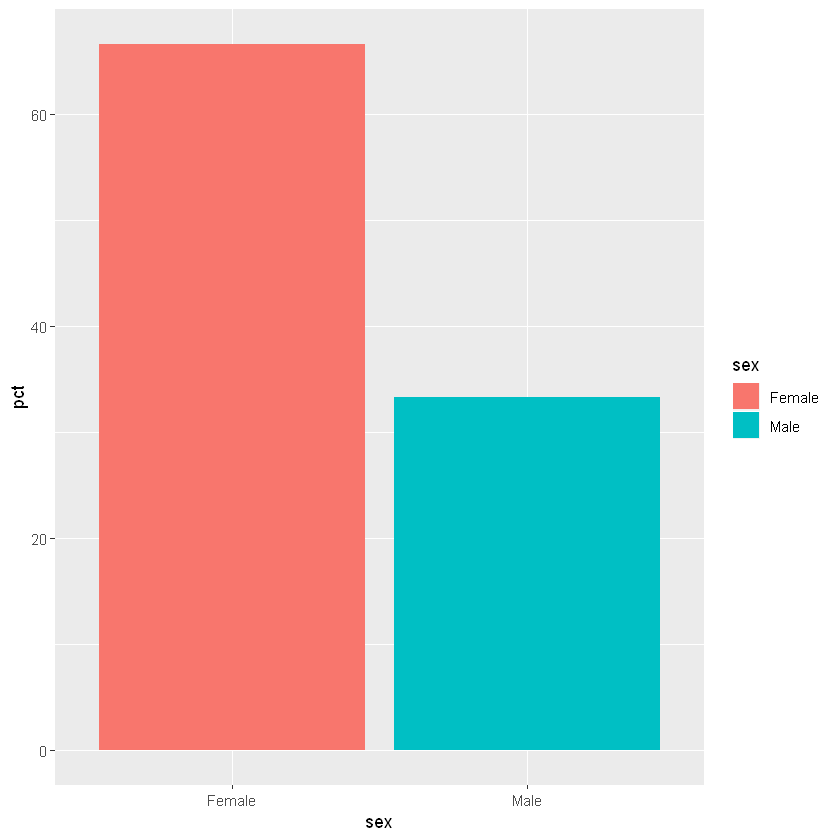

In [38]:
ggplot(sex_suic, aes(x = sex, y = pct, fill = sex)) +
    geom_col()